In [1]:
%matplotlib inline
import os
import sys
sys.path.append("..")
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyemu

In [2]:
import freyberg_setup
freyberg_setup.setup_pest_pp()
working_dir = freyberg_setup.WORKING_DIR_PP
pst_name = freyberg_setup.PST_NAME_PP

['.DS_Store', 'botm.ref', 'extract_zone_array.py', 'forecasts_true.csv', 'freyberg.bas', 'freyberg.dbf', 'freyberg.dis', 'freyberg.hds', 'freyberg.heads', 'freyberg.heads_potobs.ins', 'freyberg.hyd', 'freyberg.list', 'freyberg.locations', 'freyberg.mpbas', 'freyberg.mpenpt', 'freyberg.mplist', 'freyberg.mpnam', 'freyberg.mppthln', 'freyberg.mpsim', 'freyberg.oc', 'freyberg.pcg', 'freyberg.rivflux', 'freyberg.shp', 'freyberg.shx', 'freyberg.travel', 'freyberg.truth.lpf', 'freyberg.truth.nam', 'freyberg.truth.rch', 'freyberg.truth.riv', 'freyberg.truth.wel', 'hk.truth.ref', 'hk.zones', 'ibound.ref', 'kzone.ref', 'mpath.in', 'potobs_group.csv', 'Process_output.py', 'really_noisy_heads.txt', 'run_true_model.py', 'strt.ref', 'Weights_and_best_PHI.xlsx']

changing model workspace...
   freyberg_pp
FloPy is using the following executable to run the model: /Users/jwhite/Dev/GW1876/activities/freyberg_pilot_points_dataworth/freyberg_pp/mfnwt

                                  MODFLOW-NWT-SWR1 


In [3]:
pst = pyemu.Pst(os.path.join(working_dir,pst_name))
pst.control_data.noptmax = -1
pst.write(os.path.join(working_dir,pst_name))
freyberg_setup.run_pe(working_dir,pst_name)

In [4]:
sc = pyemu.Schur(os.path.join(working_dir,pst_name.replace(".pst",".jcb")))

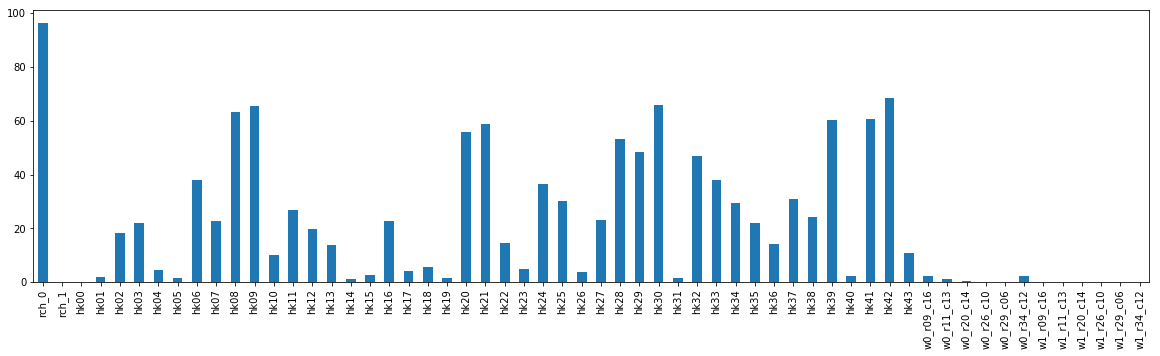

In [5]:
fig = plt.figure(figsize=(20,5))
ax = plt.subplot(111)
sc.get_parameter_summary().percent_reduction.plot(kind="bar",ax=ax)

In [17]:
df_pc = sc.get_par_contribution()


In [18]:
df_pc = 100.0 * (1.0 - df_pc / df_pc.loc["base",:])

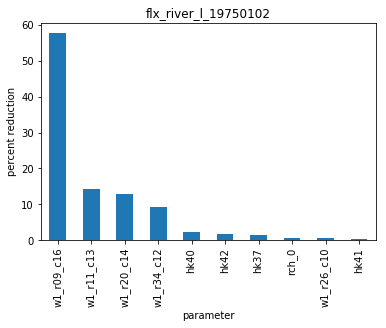

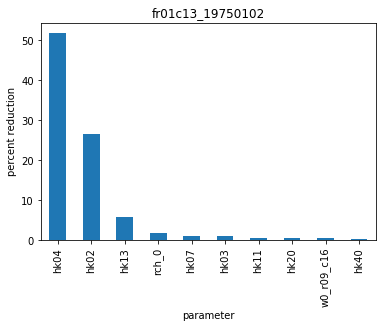

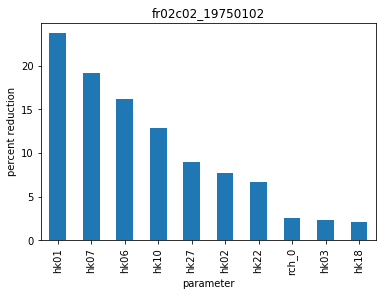

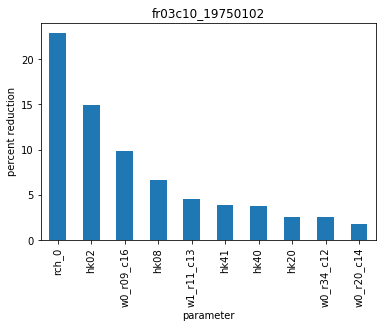

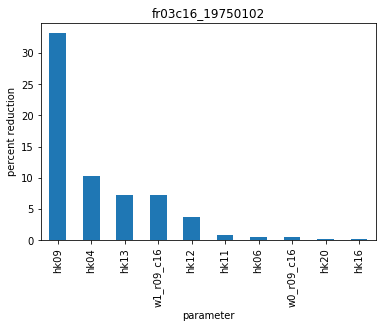

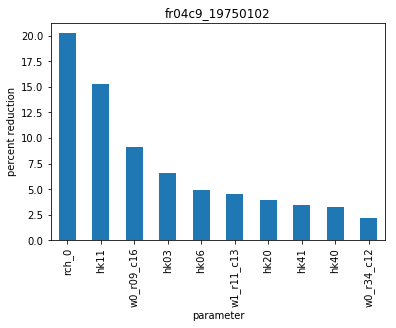

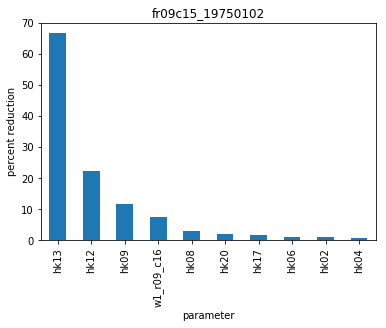

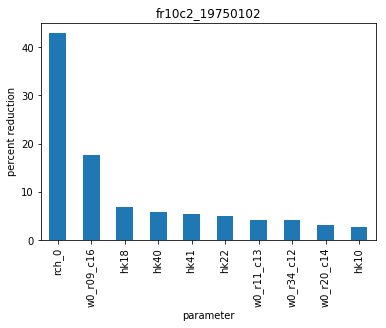

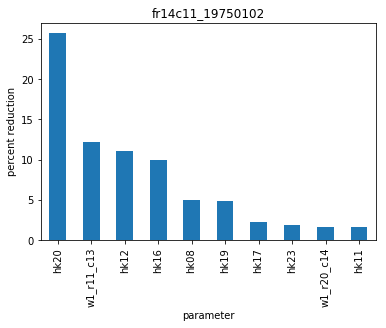

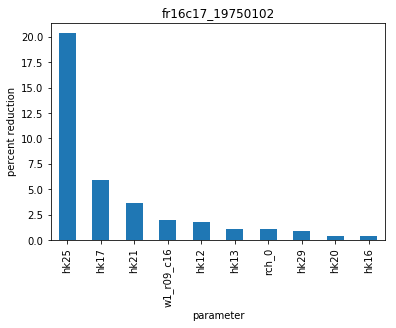

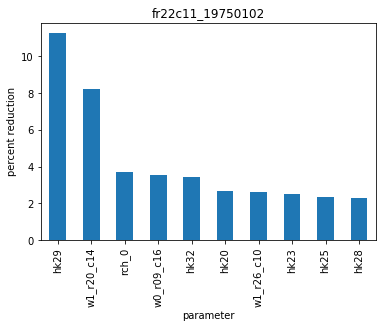

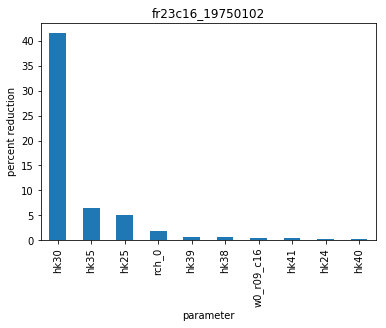

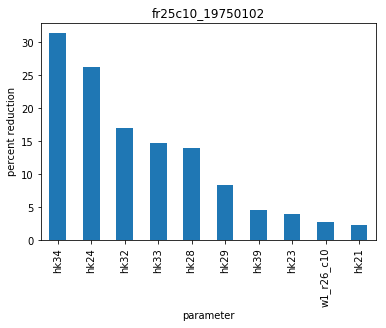

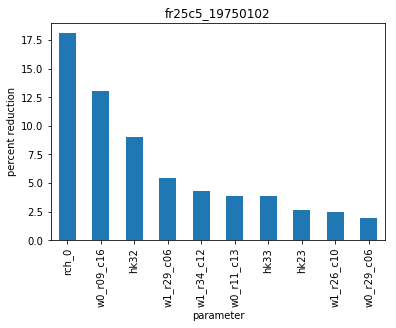

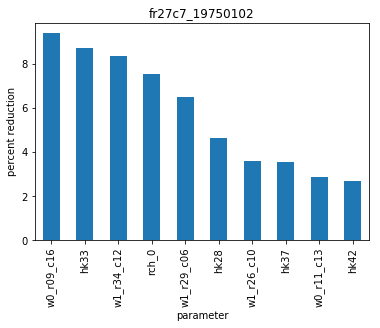

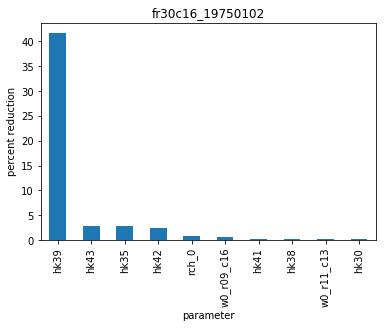

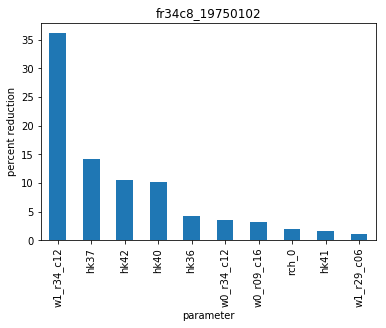

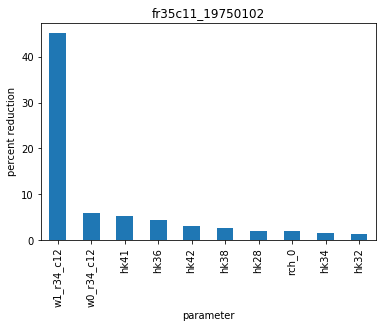

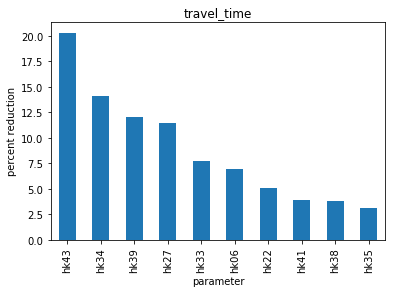

In [20]:
for forecast in df_pc.columns:
    ax = df_pc.sort_values(by=forecast,ascending=False).loc[:,forecast].iloc[:10].plot(kind="bar")
    ax.set_title(forecast)
    ax.set_ylabel("percent reduction")
    ax.set_xlabel("parameter")
    plt.show()

In [26]:
df_rm = sc.get_removed_obs_importance()
df_rm

,flx_river_l_19750102,fr01c13_19750102,fr02c02_19750102,fr03c10_19750102,fr03c16_19750102,fr04c9_19750102,fr09c15_19750102,fr10c2_19750102,fr14c11_19750102,fr16c17_19750102,fr22c11_19750102,fr23c16_19750102,fr25c10_19750102,fr25c5_19750102,fr27c7_19750102,fr30c16_19750102,fr34c8_19750102,fr35c11_19750102,travel_time
base,22374.904153,0.021377,0.922521,0.019864,0.021261,0.030953,0.631520,0.072434,0.031300,0.021249,0.020894,0.019823,0.120705,0.047003,0.042180,0.020749,0.046753,0.054187,2.296581e+07
flx_river_l_19700102,23082.992487,0.030324,1.381530,0.107788,0.023905,0.149720,0.642195,0.632920,0.044099,0.027530,0.052226,0.024141,0.183734,0.316635,0.216479,0.025931,0.112595,0.064790,3.214716e+07
cr10c2_19700102,22375.780503,0.021395,2.403403,0.019892,0.021337,0.032821,0.636058,2.879429,0.031302,0.021251,0.021048,0.019824,0.120942,0.047438,0.042783,0.020749,0.046760,0.054213,2.296693e+07
cr04c9_19700102,22374.960390,0.022366,1.068975,0.028277,0.021278,0.101171,0.658866,0.072466,0.032593,0.021307,0.020897,0.019825,0.120706,0.047007,0.042195,0.020749,0.046757,0.054194,2.307071e+07
cr16c17_19700102,22375.065073,0.021395,0.922570,0.019864,0.021325,0.030971,0.635943,0.072447,0.031458,0.160402,0.021781,0.020290,0.123174,0.047025,0.042199,0.020771,0.046753,0.054196,2.300195e+07
cr25c5_19700102,22375.591774,0.021377,0.938996,0.019869,0.021261,0.030982,0.631520,0.072436,0.031377,0.021256,0.020953,0.019831,0.147478,0.630352,0.042354,0.020756,0.046940,0.054223,2.298651e+07
cr22c11_19700102,22379.060804,0.021379,0.924173,0.019870,0.021263,0.030980,0.631819,0.072737,0.031480,0.021254,0.191605,0.020047,0.262068,0.048748,0.042445,0.020763,0.046859,0.054230,2.439687e+07
cr03c16_19700102,22375.364621,0.026551,0.923627,0.019864,0.097629,0.031642,0.759025,0.072483,0.031300,0.021699,0.020898,0.019836,0.120721,0.047004,0.042184,0.020749,0.046766,0.054193,2.296583e+07
cr27c7_19700102,22388.834813,0.021391,0.925037,0.019966,0.021264,0.031056,0.631525,0.073772,0.031357,0.021298,0.022109,0.019867,0.180750,0.047013,0.311191,0.020750,0.047518,0.054190,2.354169e+07
cr14c11_19700102,22375.006386,0.021475,0.922537,0.020400,0.021321,0.031991,0.638730,0.072689,0.172303,0.021362,0.021906,0.019824,0.123400,0.047265,0.042486,0.020752,0.046754,0.054187,2.299242e+07


In [27]:
df_rm = 100.0 * (1.0 - df_rm.loc["base",:] / df_rm)

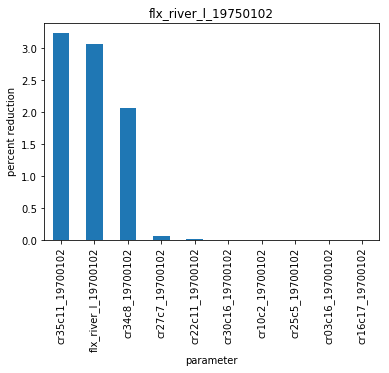

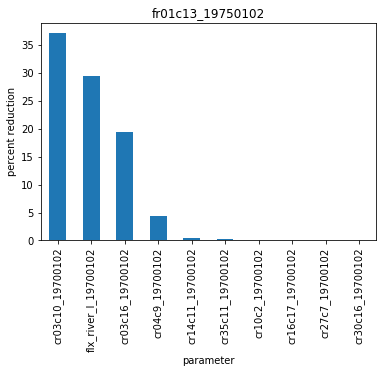

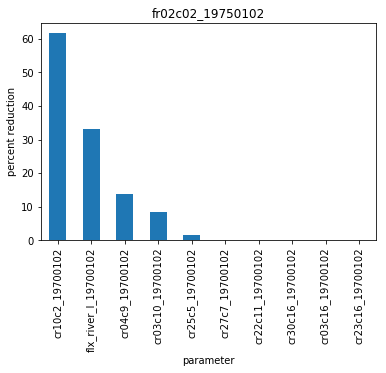

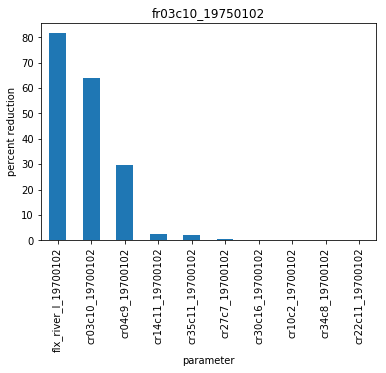

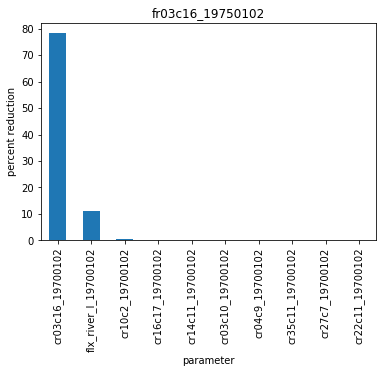

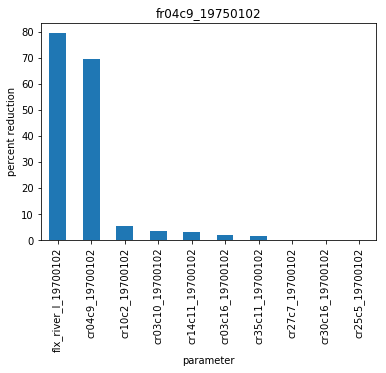

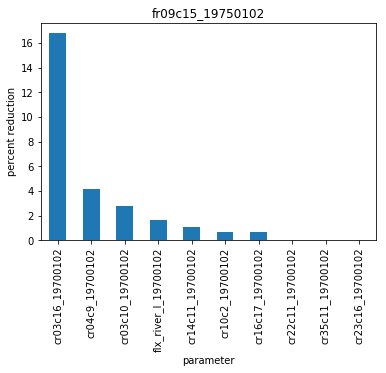

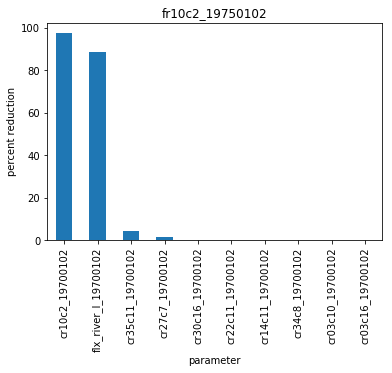

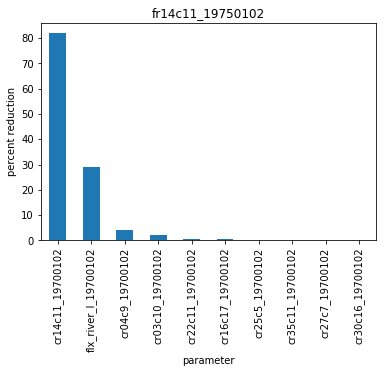

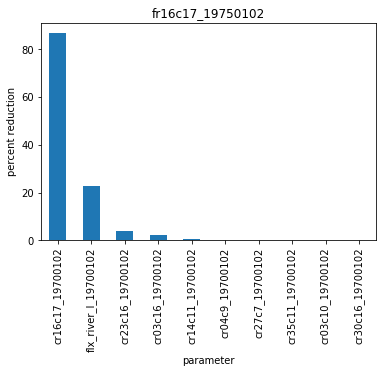

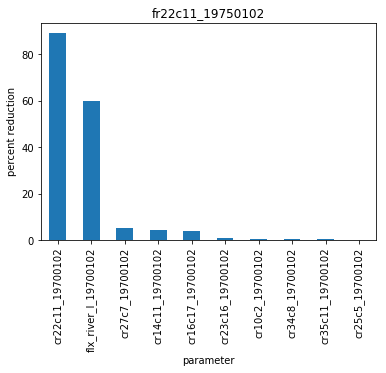

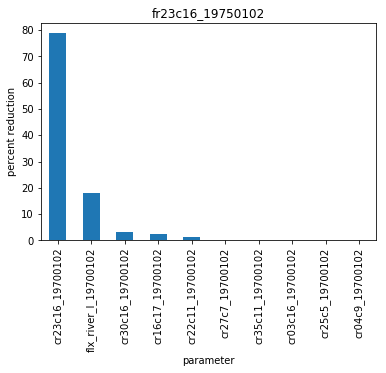

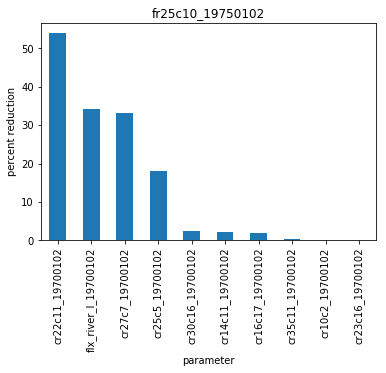

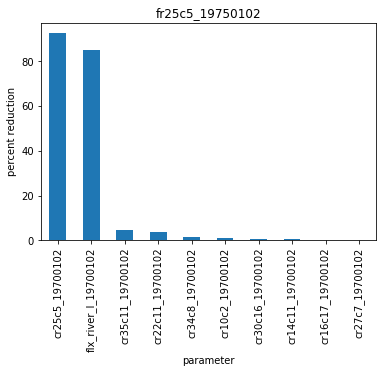

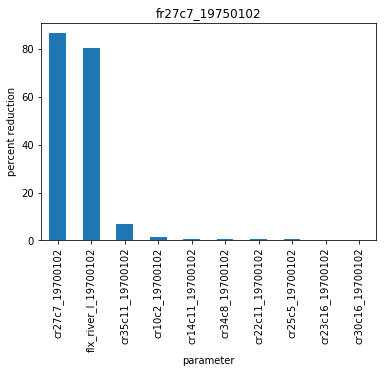

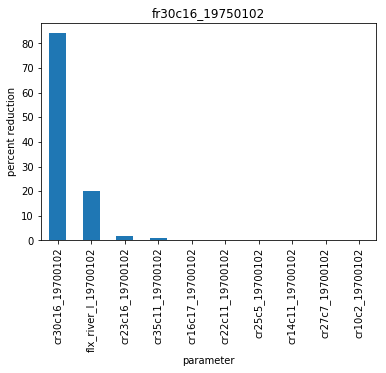

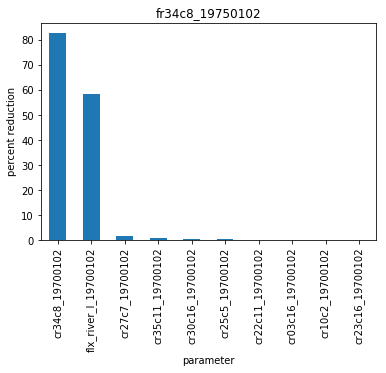

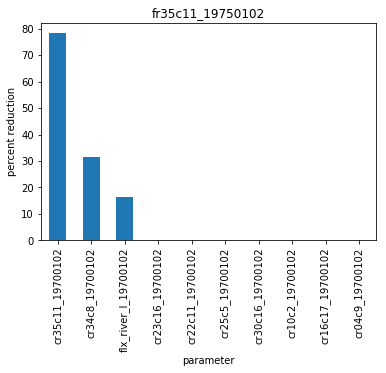

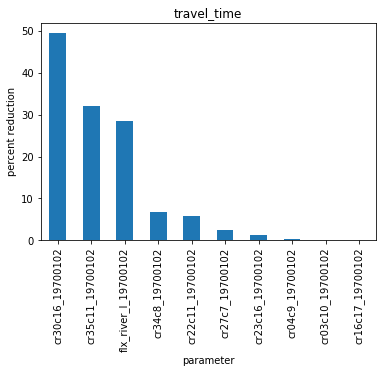

In [29]:
for forecast in df_rm.columns:
    ax = df_rm.sort_values(by=forecast,ascending=False).loc[:,forecast].iloc[:10].plot(kind="bar")
    ax.set_title(forecast)
    ax.set_ylabel("percent reduction")
    ax.set_xlabel("parameter")
    plt.show()

In [30]:
pobs_names = [o for o in sc.pst.obs_names if o.startswith("pr")]
df_ad = sc.get_added_obs_importance(obslist_dict={oname:oname for oname in pobs_names},
                                base_obslist=sc.pst.nnz_obs_names,reset_zero_weight=True)

In [31]:
df_ad.min()

flx_river_l_19750102    2.181659e+04
fr01c13_19750102        1.977810e-02
fr02c02_19750102        3.594650e-01
fr03c10_19750102        1.882941e-02
fr03c16_19750102        2.018072e-02
fr04c9_19750102         2.677875e-02
fr09c15_19750102        8.635321e-02
fr10c2_19750102         6.170443e-02
fr14c11_19750102        2.294970e-02
fr16c17_19750102        2.009755e-02
fr22c11_19750102        1.992551e-02
fr23c16_19750102        1.835494e-02
fr25c10_19750102        9.553825e-02
fr25c5_19750102         4.316479e-02
fr27c7_19750102         3.979707e-02
fr30c16_19750102        1.878527e-02
fr34c8_19750102         4.350055e-02
fr35c11_19750102        4.507864e-02
travel_time             1.983525e+07
dtype: float64

In [33]:
df_ad.max()

flx_river_l_19750102    2.237490e+04
fr01c13_19750102        2.137650e-02
fr02c02_19750102        9.225209e-01
fr03c10_19750102        1.986425e-02
fr03c16_19750102        2.126063e-02
fr04c9_19750102         3.095329e-02
fr09c15_19750102        6.315197e-01
fr10c2_19750102         7.243363e-02
fr14c11_19750102        3.130003e-02
fr16c17_19750102        2.124886e-02
fr22c11_19750102        2.089401e-02
fr23c16_19750102        1.982341e-02
fr25c10_19750102        1.207055e-01
fr25c5_19750102         4.700348e-02
fr27c7_19750102         4.218017e-02
fr30c16_19750102        2.074898e-02
fr34c8_19750102         4.675273e-02
fr35c11_19750102        5.418728e-02
travel_time             2.296581e+07
dtype: float64

In [34]:
def plot_added_worth(df):
    df_base = df.loc["base",:]
    df_frac = 100.0 * (1.0 - (df / df_base))
    df_frac = df_frac.loc[pobs_names,:]
    df_frac.loc[:,"i"] = df_frac.index.map(lambda x: int(x[2:4])-1)
    df_frac.loc[:,"j"] = df_frac.index.map(lambda x: int(x[5:7])-1)

    #for forecast in df_frac.columns:
        #if forecast in ["i","j"]:
        #    continue
    for forecast in sc.pst.forecast_names:
        
        arr = np.zeros((df_frac.i.max()+1,df_frac.j.max()+1)) - 1.0
        #for r,c,f in zip(df_frac.row,df_frac.column,df_frac.loc[:,forecast]):
        #    arr[r-1,c-1] = f
        arr[df_frac.i,df_frac.j] = df_frac.loc[:,forecast]
        arr = np.ma.masked_where(arr < 0,arr)
        fig = plt.figure(figsize=(6,10))
        ax = plt.subplot(111)
        c = ax.imshow(arr,interpolation="nearest",alpha=0.5)
        #ax.imshow(zn_arr,interpolation="nearest",alpha=0.5)
        plt.colorbar(c)
        ax.set_title(forecast)
        plt.show()

    

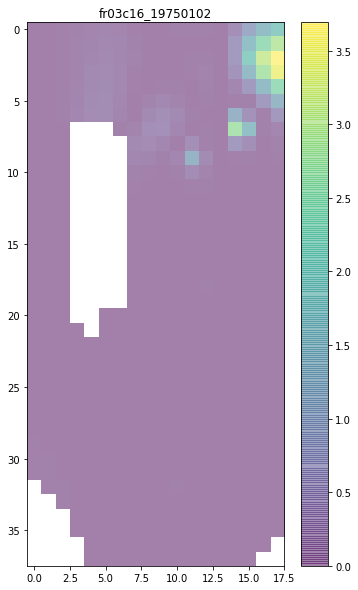

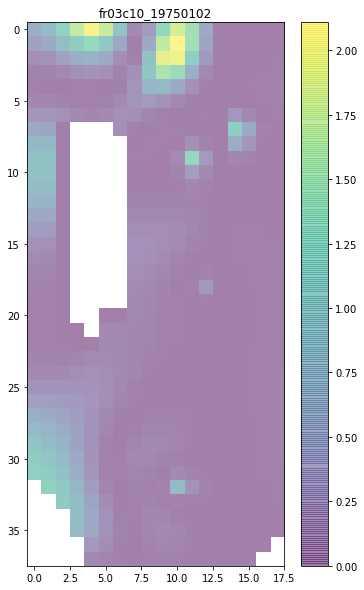

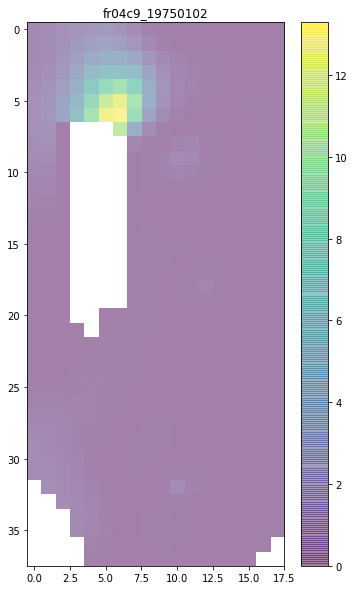

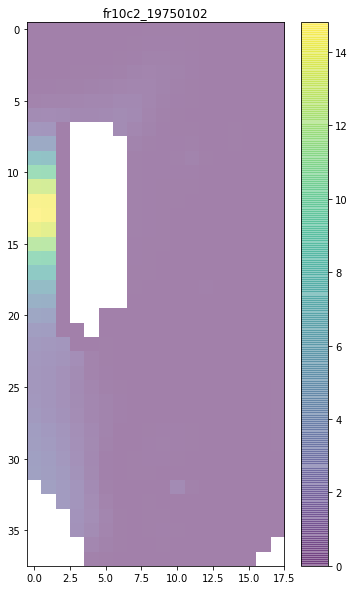

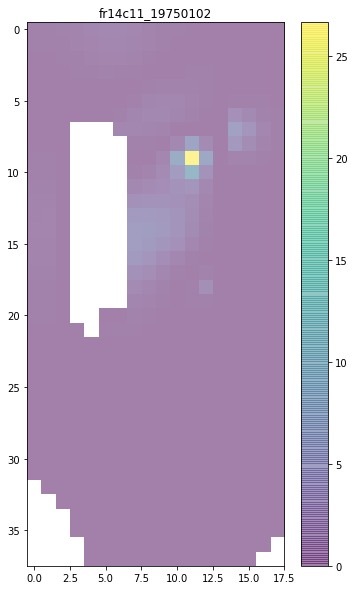

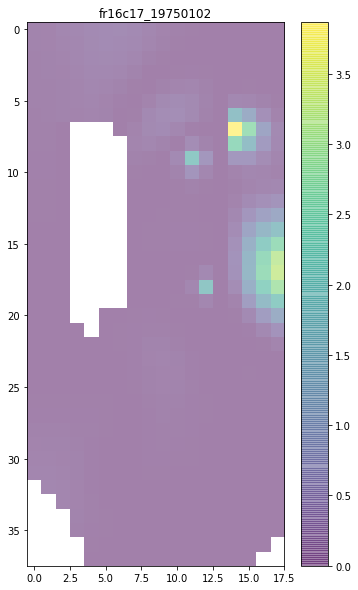

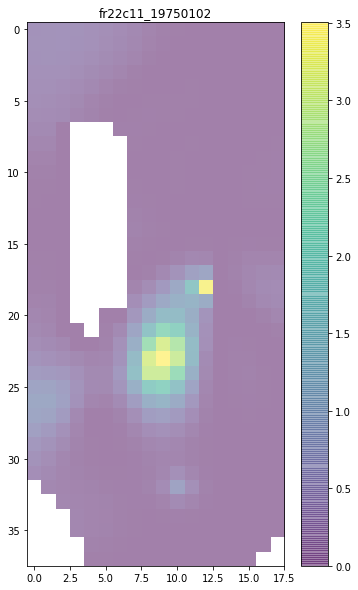

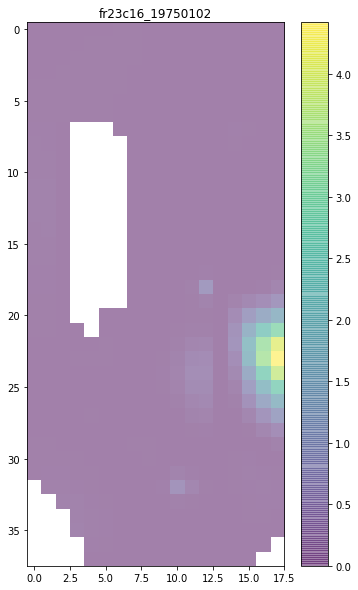

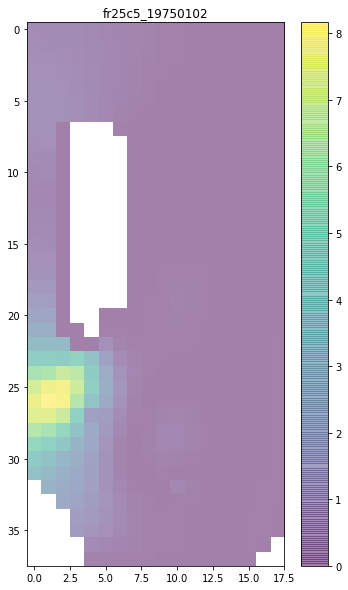

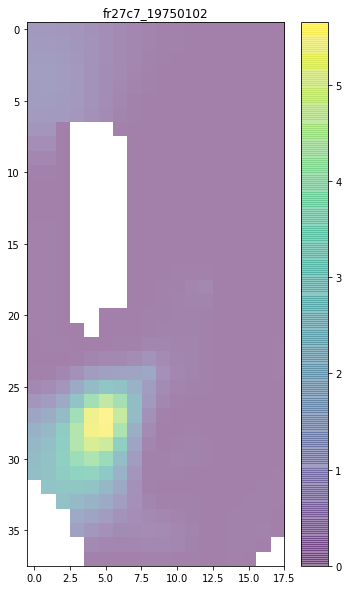

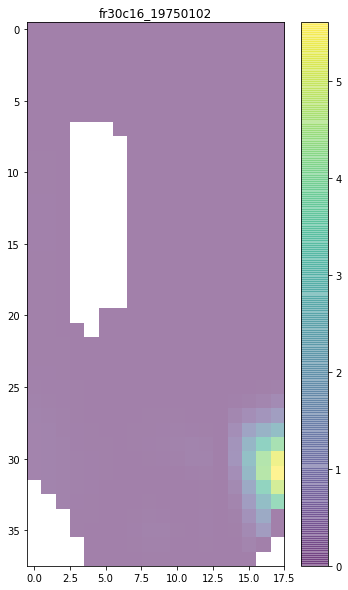

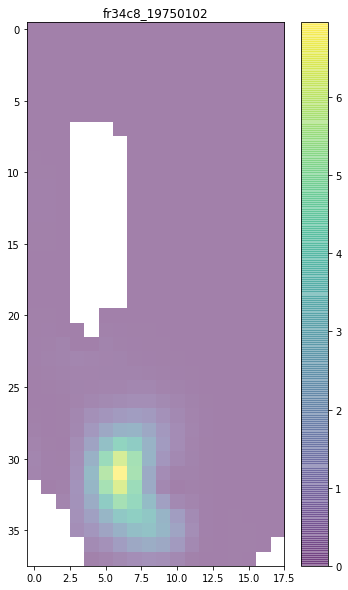

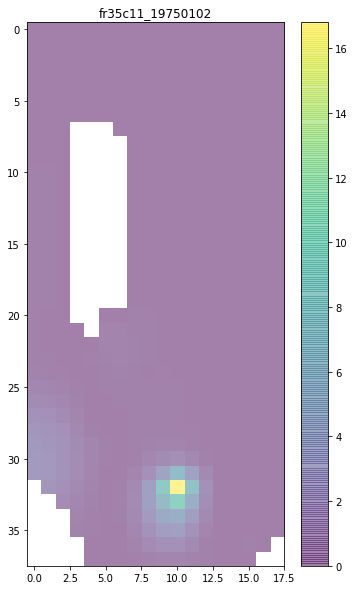

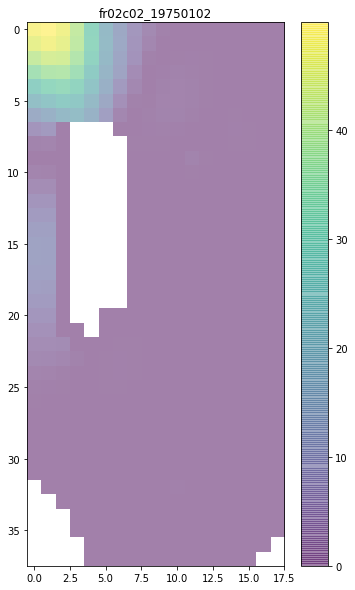

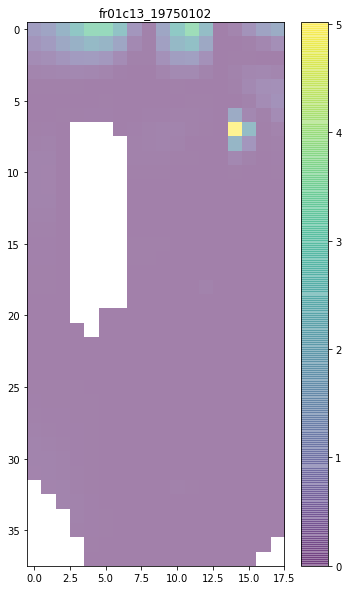

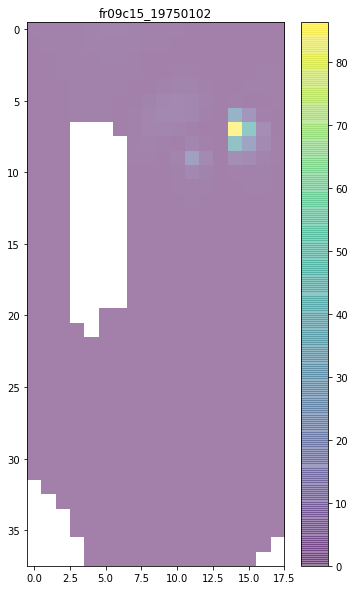

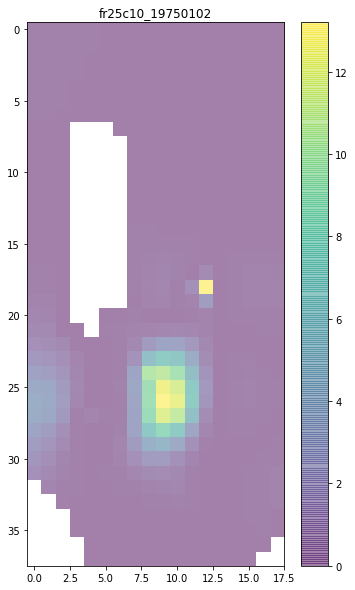

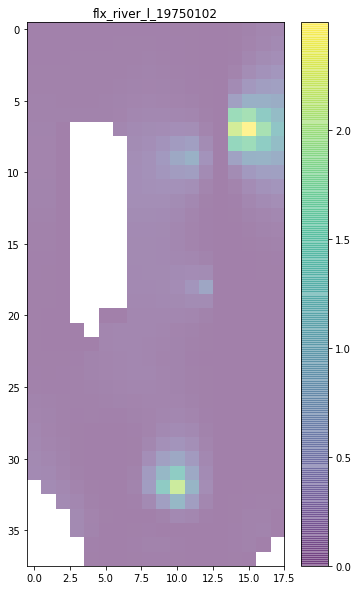

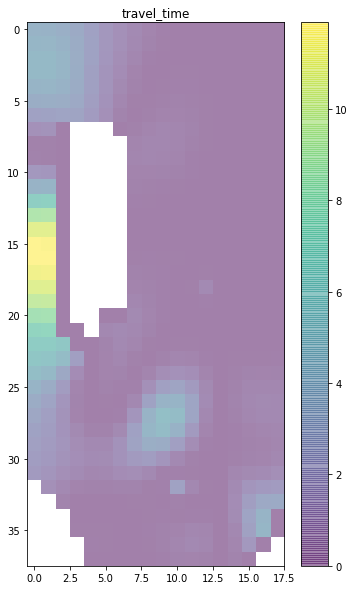

In [39]:
plot_added_worth(df_ad)

Let's explore what happens when we use a full covariance prior

In [40]:
v = pyemu.geostats.ExpVario(contribution=1.0,a=2500.0)
gs = pyemu.geostats.GeoStruct(variograms=[v])
cov = pyemu.helpers.pilotpoint_prior_builder(sc.pst,
                            struct_dict={gs:os.path.join(working_dir,"hkpp.dat.tpl")})

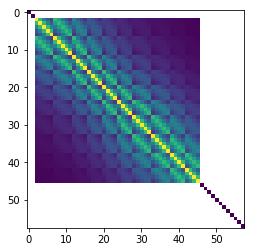

In [41]:
x = np.ma.masked_where(cov.x==0,cov.x)
plt.imshow(x)

In [42]:
sc_full = pyemu.Schur(jco=sc.jco,pst=sc.pst,parcov=cov,forecasts=sc.forecasts)

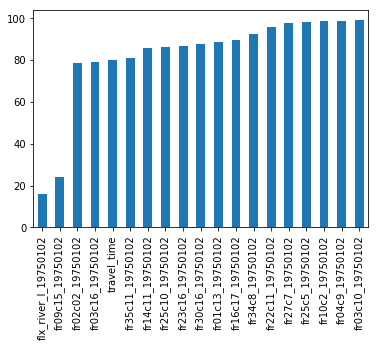

In [43]:
sc.get_forecast_summary().sort_values(by='percent_reduction').percent_reduction.plot(kind="bar")

In [49]:
df_full = sc_full.get_forecast_summary()
df_full.loc[:,"full"] = df_full.percent_reduction
df_full.loc[:,"diag"] = sc.get_forecast_summary().percent_reduction

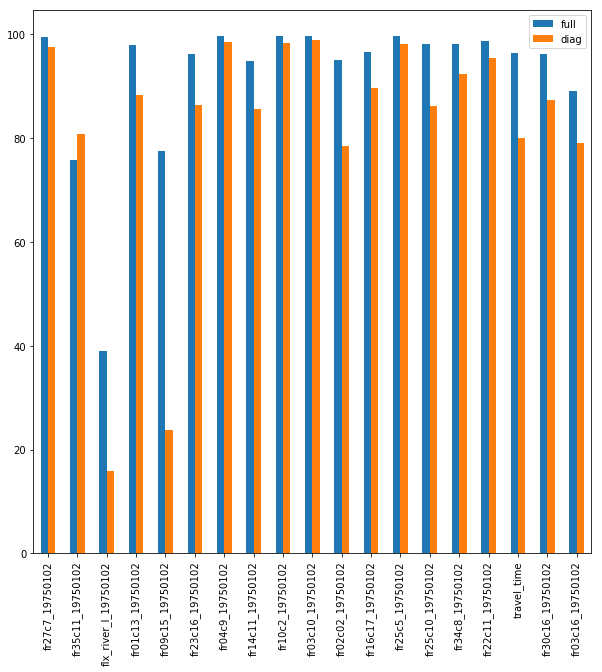

In [50]:
df_full.loc[:,["full","diag"]].plot(kind="bar",figsize=(10,10))

Why did percent reduction increase for all forecasts increase???

In [51]:
df_full.prior_var

fr27c7_19750102         7.748982e+00
fr35c11_19750102        2.174383e-01
flx_river_l_19750102    3.588482e+04
fr01c13_19750102        5.866707e-01
fr09c15_19750102        1.761416e+00
fr23c16_19750102        4.143152e-01
fr04c9_19750102         7.433556e+00
fr14c11_19750102        4.973708e-01
fr10c2_19750102         2.667925e+01
fr03c10_19750102        5.551149e+00
fr02c02_19750102        2.286963e+01
fr16c17_19750102        5.287312e-01
fr25c5_19750102         1.284000e+01
fr25c10_19750102        2.777227e+00
fr34c8_19750102         2.019401e+00
fr22c11_19750102        1.368663e+00
travel_time             4.817086e+08
fr30c16_19750102        4.671253e-01
fr03c16_19750102        1.457026e-01
Name: prior_var, dtype: float64

In [52]:
sc.get_forecast_summary().prior_var

fr27c7_19750102         1.714796e+00
fr35c11_19750102        2.807757e-01
flx_river_l_19750102    2.658873e+04
fr01c13_19750102        1.821481e-01
fr09c15_19750102        8.293621e-01
fr23c16_19750102        1.457498e-01
fr04c9_19750102         1.991566e+00
fr14c11_19750102        2.175937e-01
fr10c2_19750102         4.315901e+00
fr03c10_19750102        1.657728e+00
fr02c02_19750102        4.290906e+00
fr16c17_19750102        2.054385e-01
fr25c5_19750102         2.467100e+00
fr25c10_19750102        8.735553e-01
fr34c8_19750102         6.091313e-01
fr22c11_19750102        4.639619e-01
travel_time             1.145500e+08
fr30c16_19750102        1.643896e-01
fr03c16_19750102        1.018208e-01
Name: prior_var, dtype: float64

In [53]:
df_full = sc_full.get_added_obs_importance(obslist_dict={oname:oname for oname in pobs_names},
                                base_obslist=sc.pst.nnz_obs_names,reset_zero_weight=True)

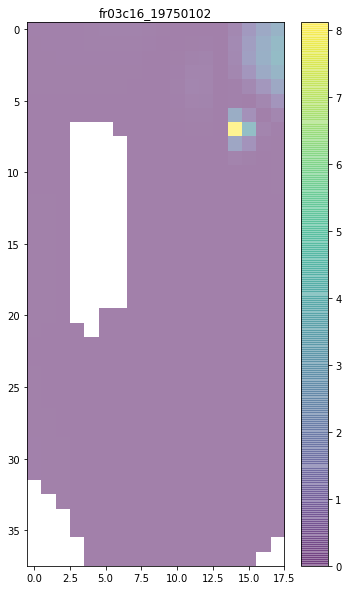

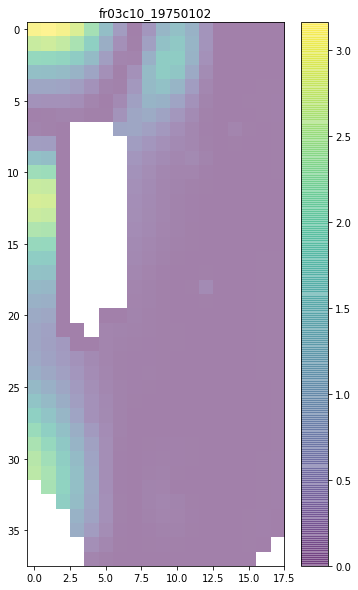

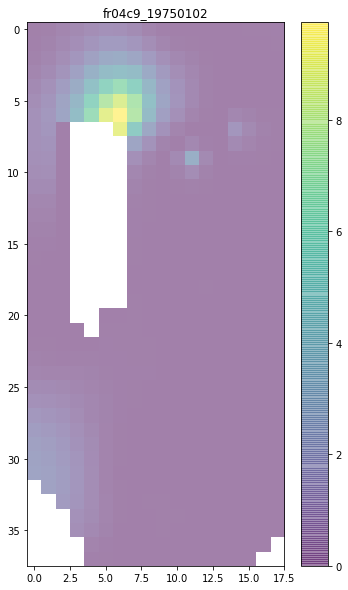

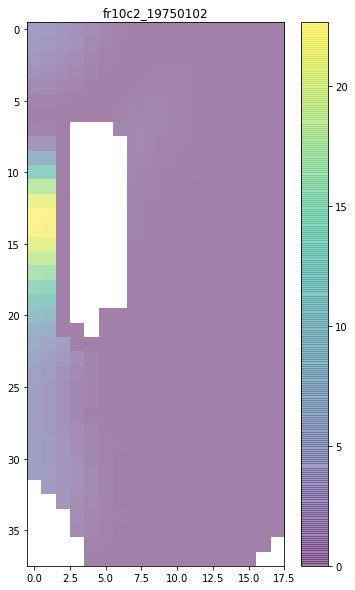

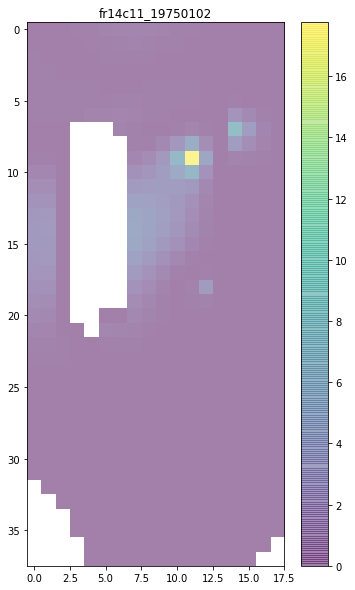

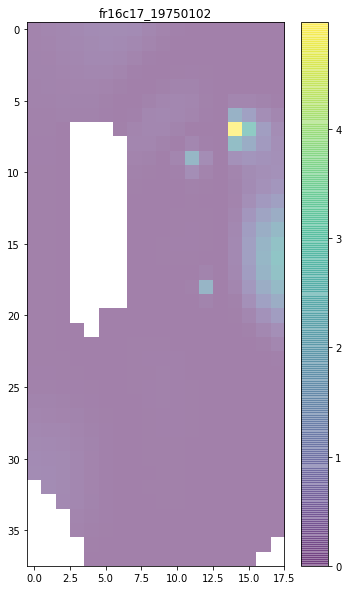

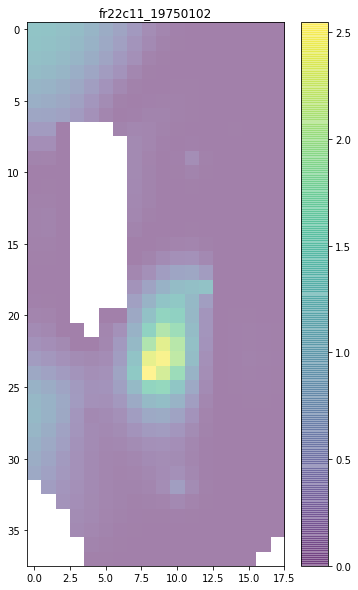

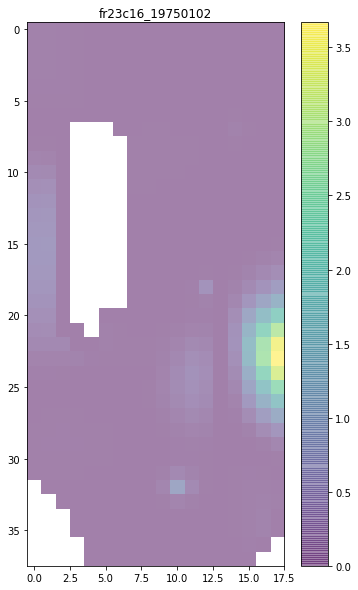

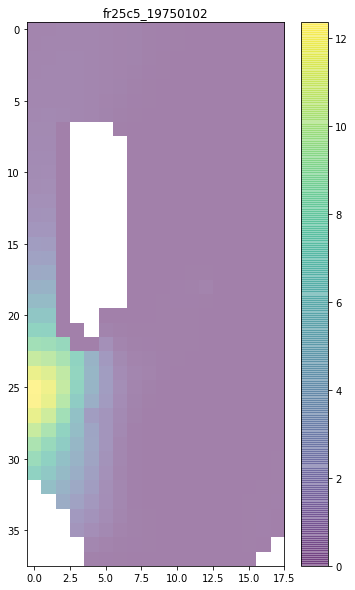

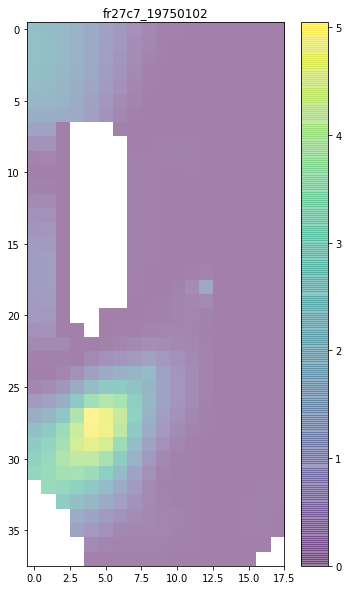

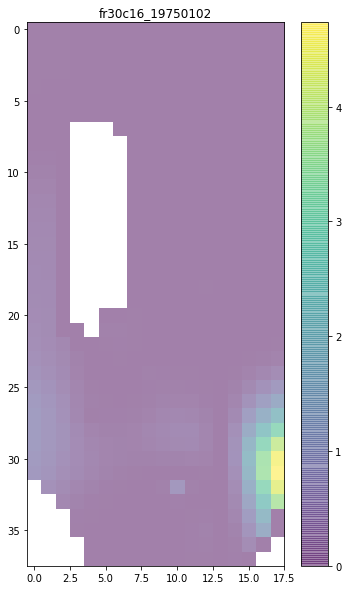

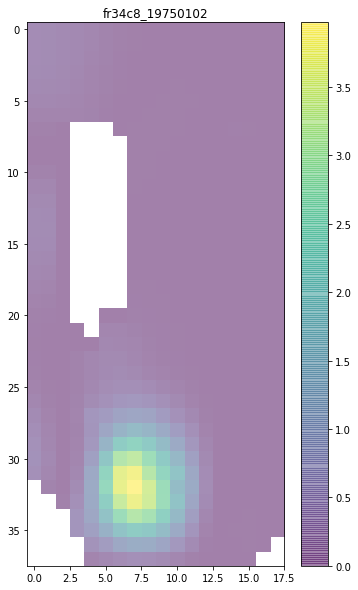

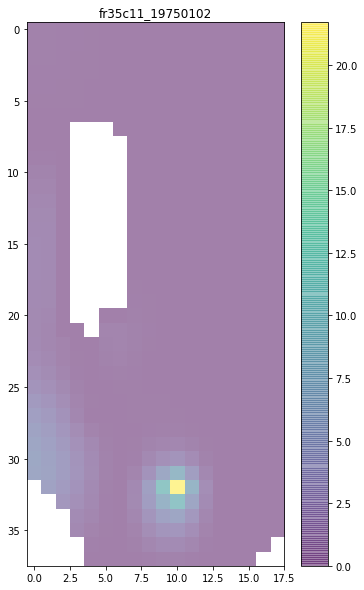

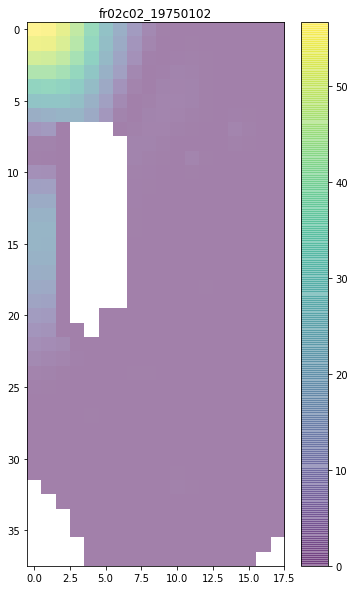

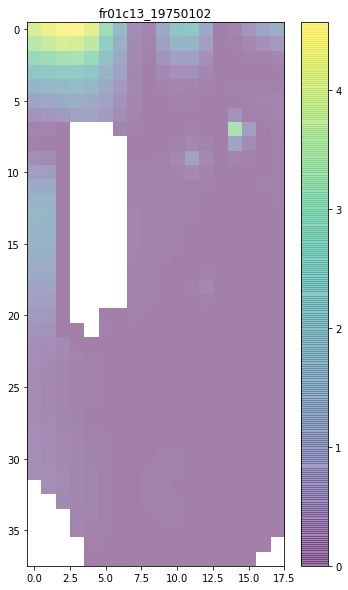

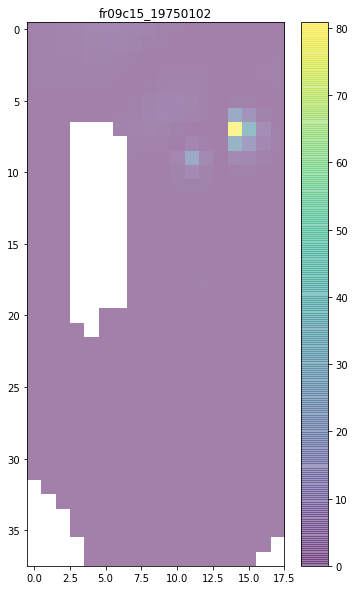

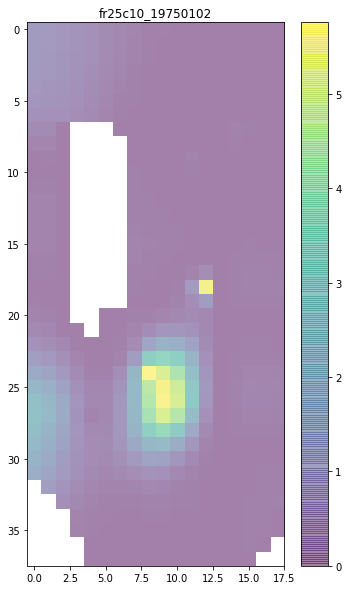

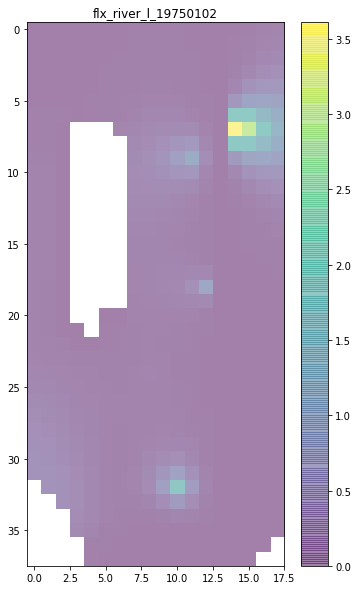

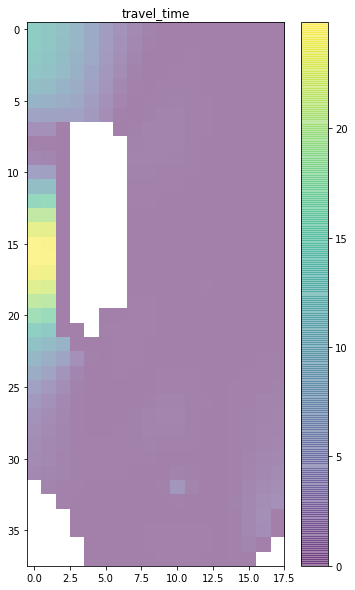

In [55]:
plot_added_worth(df_full)